In [1]:
import pandas as pd

In [142]:
df = pd.read_csv('total_odkp.csv')
print(df.shape[0])

184


In [186]:
pd.options.display.max_columns = 50
months = ['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь']
years = [2017, 2018, 2019, 2020]
odkp_year_dfs = {}
for year in years:
    df_year = pd.read_csv(f'total{year}_odkp.csv')[['odkp_id', 'orig_name'] + months]
#     df_year['key'] = df_year['odkp_id'] + '. ' + df_year['orig_name']
    df_year.rename(lambda x: x + (' ' + str(year) if x not in ['odkp_id', 'orig_name'] else ''),
                   axis='columns', inplace=True)
    odkp_year_dfs[year] = df_year
odkp_per_month_df = reduce(lambda left, right: left.merge(right, on=['odkp_id', 'orig_name'], how='outer'),
                   [odkp_year_dfs[year] for year in years])
# убрать когда пофиксим коды для наименований:
odkp_per_month_df = odkp_per_month_df[
    (odkp_per_month_df['январь 2017'].notna())&(odkp_per_month_df['январь 2018'].notna())&
    (odkp_per_month_df['январь 2019'].notna())&(odkp_per_month_df['январь 2020'].notna())
]

odkp_per_year_df = odkp_per_month_df[['odkp_id', 'orig_name']].copy()
for year in years:
    odkp_per_year_df[str(year)] = odkp_per_month_df.loc[:, f'январь {year}':f'декабрь {year}'].sum(axis='columns')

#odkp_per_month_df
# odkp_per_year_df

In [188]:
odkp_per_year_df

,odkp_id,orig_name,2017,2018,2019,2020
0,11.05.10,"Пиво, кроме отходов пивоварения,Тысяча декалитров",756034.0,777077.0,769237.0,792937.0
1,11.07.11,Воды минеральные природные питьевые и воды пит...,12044786.0,14075553.0,14888772.0,15513465.0
2,11.07.19,"Напитки безалкогольные прочие,Тысяча декалитров",633399.0,662482.0,724554.0,750686.0
3,11.07.19.190,"Напитки безалкогольные прочие, не включенные в...",275015.0,330832.0,329227.0,290807.0
4,07.10.10.120,"Руда железная товарная необогащенная, тыс.т",9454.0,9035.0,8929.0,8929.0
...,...,...,...,...,...,...
175,30.20.33.113,"Вагоны-цистерны, штук",2585.0,2871.0,3590.0,6436.0
176,30.30.31,"Вертолеты, штук",70.0,103.0,89.0,96.0
177,30.30.32,"Самолеты гражданские, штук",21.0,28.0,43.0,27.0
178,30.91.1,"Мотоциклы и мотоциклетные коляски, штук",3817.0,1841.0,1585.0,1277.0


In [177]:
odkp_per_year_df.to_csv('DANIA_RAZIEBI_POZHALUYSTA.csv')

In [182]:
print(df.shape[0])
df = odkp_per_year_df.copy()
print(df.shape[0])
df = df.reset_index()
print(df.shape[0])

184
103
103


In [189]:
df['p1'] = df['odkp_id'].apply(p1)
df['p2'] = df['odkp_id'].apply(p2)
df['p3'] = df['odkp_id'].apply(p3)
df['p4'] = df['odkp_id'].apply(p4)
df['edinicy'] = df['orig_name'].apply(get_last_part)

In [152]:
cool

[['11'], ['ысяча декалитров'], 13709248, 15845986, 16711860, 17347993]

In [197]:
dfTest = df.dropna()

In [203]:
df

,level_0,index,odkp_id,orig_name,2017,2018,2019,2020,p1,p2,p3,p4,edinicy
0,35,55,06.10,"Нефть, поступившая на переработку (первичная п...",284461.0,292014.0,289888.0,275077.0,06,10,,,поступившая на переработку (первичная перерабо...
1,4,4,07.10.10.120,"Руда железная товарная необогащенная, тыс.т",9454.0,9035.0,8929.0,8929.0,07,10,10,120,тыс.т
2,5,5,07.10.10.130,"Концентрат железорудный, тыс.т",95038.0,96058.0,97692.0,97692.0,07,10,10,130,тыс.т
3,48,68,10.11.11,"Мясо крупного рогатого скота, свинина, баранин...",2384560.0,2653937.0,2749302.0,3090563.0,10,11,11,,
4,49,69,10.11.12,Мясо крупного рогатого скота (говядина и телят...,205078.0,226855.0,242258.0,254505.0,10,11,12,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,100,177,30.30.32,"Самолеты гражданские, штук",21.0,28.0,43.0,27.0,30,30,32,,штук
89,101,178,30.91.1,"Мотоциклы и мотоциклетные коляски, штук",3817.0,1841.0,1585.0,1277.0,30,91,1,,штук
90,102,179,30.92.10,"Велосипеды двухколесные и прочие, без двигател...",1546707.0,1301187.0,1490715.0,1054915.0,30,92,10,,штук
91,12,12,31.09.12.110,"Диваны, софы, кушетки с деревянным каркасом, т...",2152823.0,2297006.0,2234889.0,2154257.0,31,09,12,110,штук


In [199]:
dfTest.sort_values(by=['p1', 'p2', 'p3', 'p4'])

,index,odkp_id,orig_name,2017,2018,2019,2020,p1,p2,p3,p4,edinicy
35,55,06.10,"Нефть, поступившая на переработку (первичная п...",284461.0,292014.0,289888.0,275077.0,06,10,,,поступившая на переработку (первичная перерабо...
4,4,07.10.10.120,"Руда железная товарная необогащенная, тыс.т",9454.0,9035.0,8929.0,8929.0,07,10,10,120,тыс.т
5,5,07.10.10.130,"Концентрат железорудный, тыс.т",95038.0,96058.0,97692.0,97692.0,07,10,10,130,тыс.т
48,68,10.11.11,"Мясо крупного рогатого скота, свинина, баранин...",2384560.0,2653937.0,2749302.0,3090563.0,10,11,11,,
49,69,10.11.12,Мясо крупного рогатого скота (говядина и телят...,205078.0,226855.0,242258.0,254505.0,10,11,12,,
...,...,...,...,...,...,...,...,...,...,...,...,...
100,177,30.30.32,"Самолеты гражданские, штук",21.0,28.0,43.0,27.0,30,30,32,,штук
101,178,30.91.1,"Мотоциклы и мотоциклетные коляски, штук",3817.0,1841.0,1585.0,1277.0,30,91,1,,штук
102,179,30.92.10,"Велосипеды двухколесные и прочие, без двигател...",1546707.0,1301187.0,1490715.0,1054915.0,30,92,10,,штук
12,12,31.09.12.110,"Диваны, софы, кушетки с деревянным каркасом, т...",2152823.0,2297006.0,2234889.0,2154257.0,31,09,12,110,штук


In [204]:
df = dfTest.sort_values(by=['p1', 'p2', 'p3', 'p4']).copy().reset_index()

In [216]:
fl = False
cur = df.loc[0]['p1']
arr = []
cool = []
cur_list1 = []
cur_list2 = []
cur_list3 = []
cur_list4 = []
edinicy_list = []
for i in range(0, df.shape[0]):
    if df.loc[i]['p1'] != cur:
        print(i, cur, df.loc[i]['p1'])
        if len(pd.unique(edinicy_list)) == 1:
            print(i)
            cool = []
            cool.append([df.loc[i-1]['p1']])
            cool.append([df.loc[i-1]['edinicy']])
            cool.append(sum(cur_list1))
            cool.append(sum(cur_list2))
            cool.append(sum(cur_list3))
            cool.append(sum(cur_list4))
            arr.append(cool)
        cur_list1 = []
        cur_list2 = []
        cur_list3 = []
        cur_list4 = []
        edinicy_list = []
        cur_list1.append(df.loc[i]['2017'])
        cur_list2.append(df.loc[i]['2018'])
        cur_list3.append(df.loc[i]['2019'])
        cur_list4.append(df.loc[i]['2020'])
        edinicy_list.append(df.loc[i]['edinicy'])
        cur = df.loc[i]['p1']
    else:
        cur_list1.append(df.loc[i]['2017'])
        cur_list2.append(df.loc[i]['2018'])
        cur_list3.append(df.loc[i]['2019'])
        cur_list4.append(df.loc[i]['2020'])
        edinicy_list.append(df.loc[i]['edinicy'])

1 06 07
1
3 07 10
3
6 10 11
6
10 11 12
12 12 13
19 13 14
24 14 15
30 15 16
34 16 17
39 17 19
44 19 20
62 20 22
70 22 24
75 24 26
79 26 29
81 29 30
81
91 30 31


In [221]:
df.loc[df['p1'] == '06']

,level_0,index,odkp_id,orig_name,2017,2018,2019,2020,p1,p2,p3,p4,edinicy
0,35,55,06.10,"Нефть, поступившая на переработку (первичная п...",284461.0,292014.0,289888.0,275077.0,06,10,,,поступившая на переработку (первичная перерабо...


In [223]:
names = pd.read_csv('rusprom_public_odkv.csv')

In [225]:
names['p1'] = names['code'].apply(p1)

In [250]:
names.loc[1799]['title']

'Переработка и консервирование мяса и мясной пищевой продукции'

In [257]:
names.sort_values(by='code')[1000:1050]

,#,id,code,title,p1
1557,1558,1558,28.92.5,Производство гусеничных тракторов,28
89,90,90,28.93,Производство машин и оборудования для производ...,28
1174,1175,1172,28.94,Производство машин и оборудования для изготовл...,28
1713,1714,1713,28.94.1,"Производство оборудования для подготовки, пряд...",28
634,635,634,28.94.2,Производство прочего оборудования для текстиль...,28
1874,1875,1875,28.94.3,"Производство оборудования для обработки шкур, ...",28
1396,1397,1396,28.94.5,Производство составных частей и принадлежносте...,28
1175,1176,1173,28.95,Производство машин и оборудования для изготовл...,28
1176,1177,1174,28.96,Производство машин и оборудования для перерабо...,28
431,432,429,28.99,Производство прочих машин и оборудования специ...,28


In [233]:
names.loc[names['code'] == '06']

,#,id,code,title,p1


In [261]:
import numpy as np
import matplotlib.pyplot as plt

In [267]:
years

[2017, 2018, 2019, 2020]

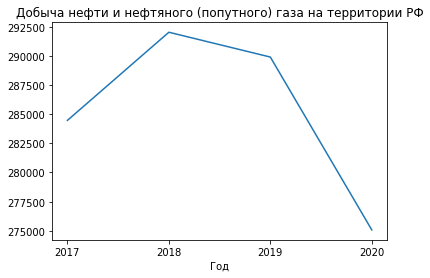

In [280]:
plt.title('Добыча нефти и нефтяного (попутного) газа на территории РФ')
plt.xlabel('Год')
#plt.ylabel('бар.')
plt.xticks(np.arange(min(years), max(years) + 1, 1.0))
#plt.xtics(ticks=years)
plt.plot([2017, 2018, 2019, 2020], [284461.0, 292014.0, 289888.0, 275077.0])

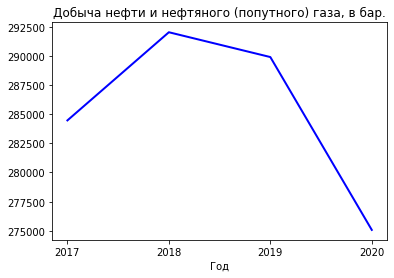

In [283]:
fig, ax = plt.subplots()
plt.title('Добыча нефти и нефтяного (попутного) газа, в бар.')
ax.set_xlabel('Год')
# ax.set_ylabel('бар.')
ax.set_xticks(years)
_ = ax.plot(years, [284461.0, 292014.0, 289888.0, 275077.0], color='blue', linewidth=2)

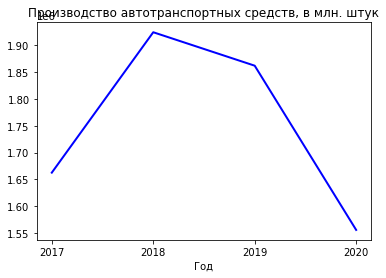

In [298]:
fig, ax = plt.subplots()
plt.title('Производство автотранспортных средств, в млн. штук')
ax.set_xlabel('Год')
# ax.set_ylabel('бар.')
ax.set_xticks(years)
_ = ax.plot(years, [1662692.0, 1924482.0, 1862122.0, 1555930.0], color='blue', linewidth=2)

In [299]:
arr[4]

IndexError: list index out of range

In [258]:
arr[3].append('Производство автотранспортных средств')

In [217]:
arr[3]

[[['06'],
  ['поступившая на переработку (первичная переработка нефти)'],
  284461.0,
  292014.0,
  289888.0,
  275077.0],
 [['07'], ['тыс.т'], 104492.0, 105093.0, 106621.0, 106621.0],
 [['10'], [''], 4760893.0, 5295378.0, 5487593.0, 6171697.0],
 [['29'], ['штук'], 1662692.0, 1924482.0, 1862122.0, 1555930.0]]

In [154]:
edinicy_list

['ысяча декалитров',
 'ысяча полулитров',
 'ысяча декалитров',
 'ысяча декалитров']

In [124]:
def p4(string):
    if pd.isna(string) == True:
        return ''
    pleft = string
    if pleft.find('.') != -1:
        p1 = string[:string.find('.')]
        pleft = string[string.find('.') + 1:]
    else:
        p1 = pleft
        pleft = ''
    if pleft.find('.') != -1:
        p2 = pleft[:pleft.find('.')]
        pleft = pleft[string.find('.') + 1:]
    else:
        p2 = pleft
        pleft = ''
    if pleft.find('.') != -1:
        p3 = pleft[:pleft.find('.')]
        pleft = pleft[string.find('.') + 1:]
    else:
        p3 = pleft
        pleft = ''
    if pleft.find('.') != -1:
        p4 = pleft[:pleft.find('.')]
        pleft = pleft[string.find('.') + 1:]
    else:
        p4 = pleft
        pleft = ''
    return p4

In [87]:
def p3(string):
    if pd.isna(string) == True:
        return ''
    pleft = string
    if pleft.find('.') != -1:
        p1 = string[:string.find('.')]
        pleft = string[string.find('.') + 1:]
    else:
        p1 = pleft
        pleft = ''
    if pleft.find('.') != -1:
        p2 = pleft[:pleft.find('.')]
        pleft = pleft[string.find('.') + 1:]
    else:
        p2 = pleft
        pleft = ''
    if pleft.find('.') != -1:
        p3 = pleft[:pleft.find('.')]
        pleft = pleft[string.find('.') + 1:]
    else:
        p3 = pleft
        pleft = ''
    return p3

In [86]:
def p2(string):
    if pd.isna(string) == True:
        return ''
    pleft = string
    if pleft.find('.') != -1:
        p1 = string[:string.find('.')]
        pleft = string[string.find('.') + 1:]
    else:
        p1 = pleft
        pleft = ''
    if pleft.find('.') != -1:
        p2 = pleft[:pleft.find('.')]
        pleft = pleft[string.find('.') + 1:]
    else:
        p2 = pleft
        pleft = ''
    return p2

In [91]:
def p1(string):
    if pd.isna(string) == True:
        return ''
    pleft = string
    if pleft.find('.') != -1:
        p1 = string[:string.find('.')]
        pleft = string[string.find('.') + 1:]
    else:
        p1 = pleft
        pleft = ''
    return p1

In [125]:
df.sort_values(by='odkp_id')

,index,odkp_id,orig_name,2017,2018,2019,2020,p1,p2,p3,p4
35,55,06.10,"Нефть, поступившая на переработку (первичная п...",284461.0,292014.0,289888.0,275077.0,06,10,,
4,4,07.10.10.120,"Руда железная товарная необогащенная, тыс.т",9454.0,9035.0,8929.0,8929.0,07,10,10,120
5,5,07.10.10.130,"Концентрат железорудный, тыс.т",95038.0,96058.0,97692.0,97692.0,07,10,10,130
48,68,10.11.11,"Мясо крупного рогатого скота, свинина, баранин...",2384560.0,2653937.0,2749302.0,3090563.0,10,11,11,
49,69,10.11.12,Мясо крупного рогатого скота (говядина и телят...,205078.0,226855.0,242258.0,254505.0,10,11,12,
...,...,...,...,...,...,...,...,...,...,...,...
28,34,NaN,Домики садовые и постройки хозяйственные приус...,13046.0,9223.0,11860.0,4861.0,,,,
40,60,NaN,"Изделия трикотажные или вязаные, тыс.шт",141808.0,138750.0,150654.0,151401.0,,,,
41,61,NaN,"Пальто, полупальто из текстильных материалов, ...",1185.0,1330.0,1292.0,909.0,,,,
42,62,NaN,"Куртки из текстильных материалов, кроме трик...",2557.0,2583.0,2946.0,2797.0,,,,


In [113]:
def get_last_part(string):
    if string.rfind(',') != -1:
        return string[string.rfind(',') + 2:]
    else:
        return ''

In [40]:
from functools import reduce

In [43]:
pd.options.display.max_columns = 50
months = ['январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь']
years = [2017, 2018, 2019, 2020]
odkp_year_dfs = {}
for year in years:
    df_year = pd.read_csv(f'total{year}_odkp.csv')[['odkp_id', 'orig_name'] + months]
    df_year.rename(lambda x: x + (' ' + str(year) if x not in ['odkp_id', 'orig_name'] else ''),
                   axis='columns', inplace=True)
    odkp_year_dfs[year] = df_year
odkp_per_month_df = reduce(lambda left, right: left.merge(right, on=['odkp_id', 'orig_name'], how='outer'),
                   [odkp_year_dfs[year] for year in years])
odkp_per_month_df


,odkp_id,orig_name,январь 2017,февраль 2017,март 2017,апрель 2017,май 2017,июнь 2017,июль 2017,август 2017,сентябрь 2017,октябрь 2017,ноябрь 2017,декабрь 2017,январь 2018,февраль 2018,март 2018,апрель 2018,май 2018,июнь 2018,июль 2018,август 2018,сентябрь 2018,октябрь 2018,ноябрь 2018,декабрь 2018,январь 2019,февраль 2019,март 2019,апрель 2019,май 2019,июнь 2019,июль 2019,август 2019,сентябрь 2019,октябрь 2019,ноябрь 2019,декабрь 2019,январь 2020,февраль 2020,март 2020,апрель 2020,май 2020,июнь 2020,июль 2020,август 2020,сентябрь 2020,октябрь 2020,ноябрь 2020,декабрь 2020
0,11.05.10,"Пиво, кроме отходов пивоварения,Тысяча декалитров",40810.0,54201.0,69691.0,68669.0,77971.0,69887.0,72594.0,75223.0,57619.0,53862.0,57810.0,57697.0,42217.0,50696.0,61403.0,72323.0,81236.0,76869.0,81634.0,74545.0,56638.0,58106.0,62401.0,59009.0,44855.0,51177.0,59974.0,73953.0,82983.0,79361.0,77706.0,67228.0,57434.0,57142.0,59751.0,57673.0,44592.0,52796.0,63158.0,72131.0,77254.0,83992.0,90790.0,73441.0,58753.0,55572.0,56917.0,63541.0
1,11.07.11,Воды минеральные природные питьевые и воды пит...,741008.0,818622.0,1093230.0,1071482.0,1192726.0,1126032.0,1177889.0,1214040.0,922500.0,849992.0,895315.0,941950.0,856803.0,922684.0,1130279.0,1275992.0,1411798.0,1363124.0,1436913.0,1345153.0,1063877.0,1067643.0,1078276.0,1123011.0,913457.0,1029482.0,1232094.0,1407348.0,1526650.0,1559786.0,1452846.0,1217522.0,1109654.0,1105583.0,1117590.0,1216760.0,1050988.0,1175005.0,1442013.0,1293706.0,1277633.0,1548622.0,1716922.0,1336067.0,1174449.0,1138588.0,1104718.0,1254754.0
2,11.07.19,"Напитки безалкогольные прочие,Тысяча декалитров",28757.0,37422.0,59950.0,64476.0,70431.0,71618.0,60298.0,61194.0,47234.0,39377.0,43709.0,48933.0,31489.0,39819.0,54782.0,67786.0,75262.0,79600.0,73146.0,59351.0,49646.0,40793.0,42631.0,48177.0,37372.0,44853.0,61124.0,74565.0,85116.0,93639.0,73726.0,56075.0,51456.0,41027.0,53019.0,52582.0,38844.0,46463.0,64702.0,64560.0,71274.0,89213.0,90036.0,69611.0,52151.0,51438.0,52581.0,59813.0
3,11.07.19.190,"Напитки безалкогольные прочие, не включенные в...",12631.0,17087.0,26342.0,26714.0,28151.0,28525.0,24166.0,25565.0,21361.0,19168.0,21264.0,24041.0,17034.0,20339.0,27210.0,31753.0,34944.0,36199.0,33326.0,30890.0,27336.0,21786.0,23023.0,26992.0,19911.0,22469.0,28493.0,32294.0,34842.0,36840.0,33201.0,19884.0,25212.0,22268.0,25614.0,28199.0,16910.0,18610.0,25262.0,23256.0,23371.0,29475.0,32854.0,27552.0,22484.0,23860.0,23597.0,23576.0
4,07.10.10.120,"Руда железная товарная необогащенная, тыс.т",651.0,716.0,793.0,838.0,859.0,859.0,817.0,881.0,815.0,761.0,733.0,731.0,683.0,663.0,704.0,749.0,783.0,768.0,859.0,732.0,777.0,752.0,750.0,815.0,726.0,676.0,775.0,651.0,708.0,728.0,747.0,806.0,803.0,795.0,727.0,787.0,726.0,676.0,775.0,651.0,708.0,728.0,747.0,806.0,803.0,795.0,727.0,787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.10.59.130,"Автомобили пожарные, штук",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,22.0,22.0,79.0,114.0,86.0,65.0,82.0,122.0,150.0,120.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,29.20.23.130,Средства транспортные для коммунального хозяйс...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,307.0,269.0,300.0,270.0,354.0,348.0,465.0,376.0,589.0,682.0,861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,"Прицепы и полуприцепы, технически допустимая м...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3097.0,6269.0,7456.0,8015.0,9358.0,9966.0,9167.0,8467.0,7735.0,7694.0,5944.0,5529.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,"Прицепы и полуприцепы тракторные, штук",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.0,504.0,646.0,500.0,577.0,551.0,468.0,341.0,359.0,564.0,555.0,713.0

In [44]:
odkp_per_year_df = odkp_per_month_df[['odkp_id', 'orig_name']].copy()
for year in years:
    odkp_per_year_df[str(year)] = odkp_per_month_df.loc[:, f'январь {year}':f'декабрь {year}'].sum(axis='columns')
odkp_per_year_df

,odkp_id,orig_name,2017,2018,2019,2020
0,11.05.10,"Пиво, кроме отходов пивоварения,Тысяча декалитров",756034.0,777077.0,769237.0,792937.0
1,11.07.11,Воды минеральные природные питьевые и воды пит...,12044786.0,14075553.0,14888772.0,15513465.0
2,11.07.19,"Напитки безалкогольные прочие,Тысяча декалитров",633399.0,662482.0,724554.0,750686.0
3,11.07.19.190,"Напитки безалкогольные прочие, не включенные в...",275015.0,330832.0,329227.0,290807.0
4,07.10.10.120,"Руда железная товарная необогащенная, тыс.т",9454.0,9035.0,8929.0,8929.0
...,...,...,...,...,...,...
239,29.10.59.130,"Автомобили пожарные, штук",0.0,1029.0,0.0,0.0
240,29.20.23.130,Средства транспортные для коммунального хозяйс...,0.0,5121.0,0.0,0.0
241,NaN,"Прицепы и полуприцепы, технически допустимая м...",0.0,88697.0,0.0,0.0
242,NaN,"Прицепы и полуприцепы тракторные, штук",0.0,6161.0,6609.0,7062.0


In [17]:
p2

'05.10'

In [11]:
p1 = df.loc[0]['odkp_id'][:df.loc[0]['odkp_id'].find('.')]
p1

'11'

In [14]:
p2 = df.loc[0]['odkp_id'][df.loc[0]['odkp_id'].find('.') + 1:]
p2

'05.10'

In [ ]:
p3 = p2.find

In [7]:
df.loc[0]['odkp_id']

AttributeError: 'str' object has no attribute 'parse'